In [1]:
install.packages("openintro")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [61]:
rm(list = ls())

In [62]:
library(openintro)
library(ggplot2)
library(data.table)

In [63]:
head(bdims)

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


In [64]:
bdims <- data.table(bdims)

In [65]:
bdims[sex == 1,sex2 := "Male"]
bdims[sex == 0,sex2 := "Female"]

In [66]:
head(bdims)

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex,sex2
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1,Male
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1,Male
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1,Male
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1,Male
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1,Male
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1,Male


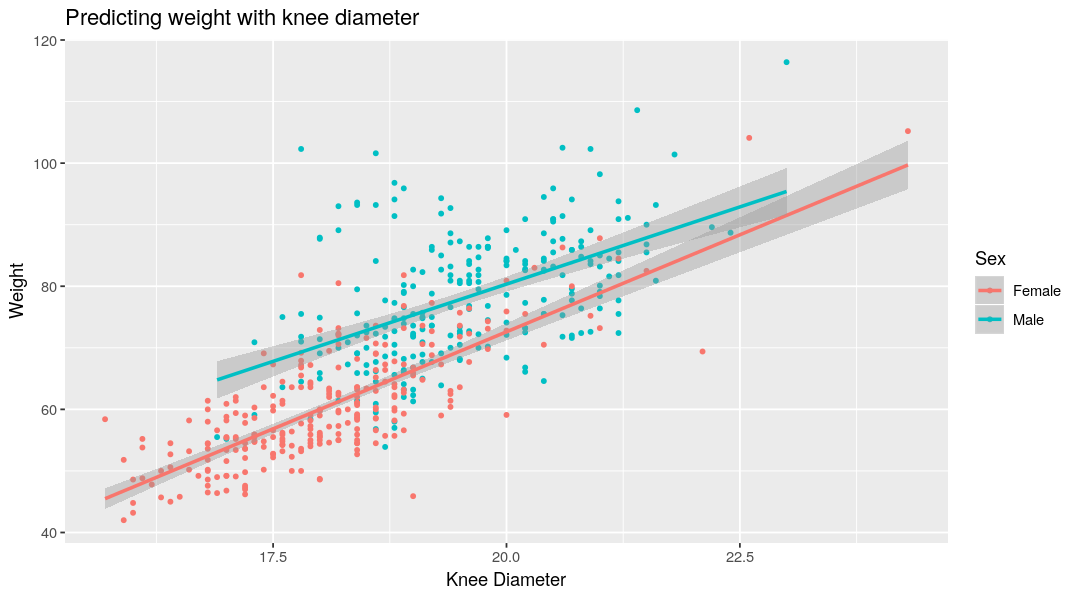

In [76]:
options(repr.plot.width = 9, repr.plot.height = 5)

ggplot(bdims,aes(x = kne.di, y = wgt,color = as.factor(sex2))) + 
    geom_point(size = 1) + 
    geom_smooth(method = lm,formula = y ~ poly(x,1)) + 
    labs(x = "Knee Diameter", y = "Weight", color = "Sex") + 
    ggtitle("Predicting weight with knee diameter")

In [43]:
model = lm(wgt ~ poly(kne.di,6),bdims)
summary(model)

model = lm(wgt ~ poly(kne.di,1),bdims)
summary(model)


Call:
lm(formula = wgt ~ poly(kne.di, 6), data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.856  -5.745  -0.945   4.728  41.589 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       69.1475     0.3805 181.743   <2e-16 ***
poly(kne.di, 6)1 229.9720     8.5669  26.844   <2e-16 ***
poly(kne.di, 6)2 -11.6723     8.5669  -1.362   0.1737    
poly(kne.di, 6)3  -2.3175     8.5669  -0.271   0.7869    
poly(kne.di, 6)4  14.9932     8.5669   1.750   0.0807 .  
poly(kne.di, 6)5 -10.1237     8.5669  -1.182   0.2379    
poly(kne.di, 6)6  -8.4651     8.5669  -0.988   0.3236    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.567 on 500 degrees of freedom
Multiple R-squared:  0.5928,	Adjusted R-squared:  0.5879 
F-statistic: 121.3 on 6 and 500 DF,  p-value: < 2.2e-16



Call:
lm(formula = wgt ~ poly(kne.di, 1), data = bdims)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.702  -5.877  -1.267   4.968  40.820 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      69.1475     0.3814  181.32   <2e-16 ***
poly(kne.di, 1) 229.9720     8.5869   26.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.587 on 505 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.586 
F-statistic: 717.3 on 1 and 505 DF,  p-value: < 2.2e-16
